# PROJECT OVERVIEW 


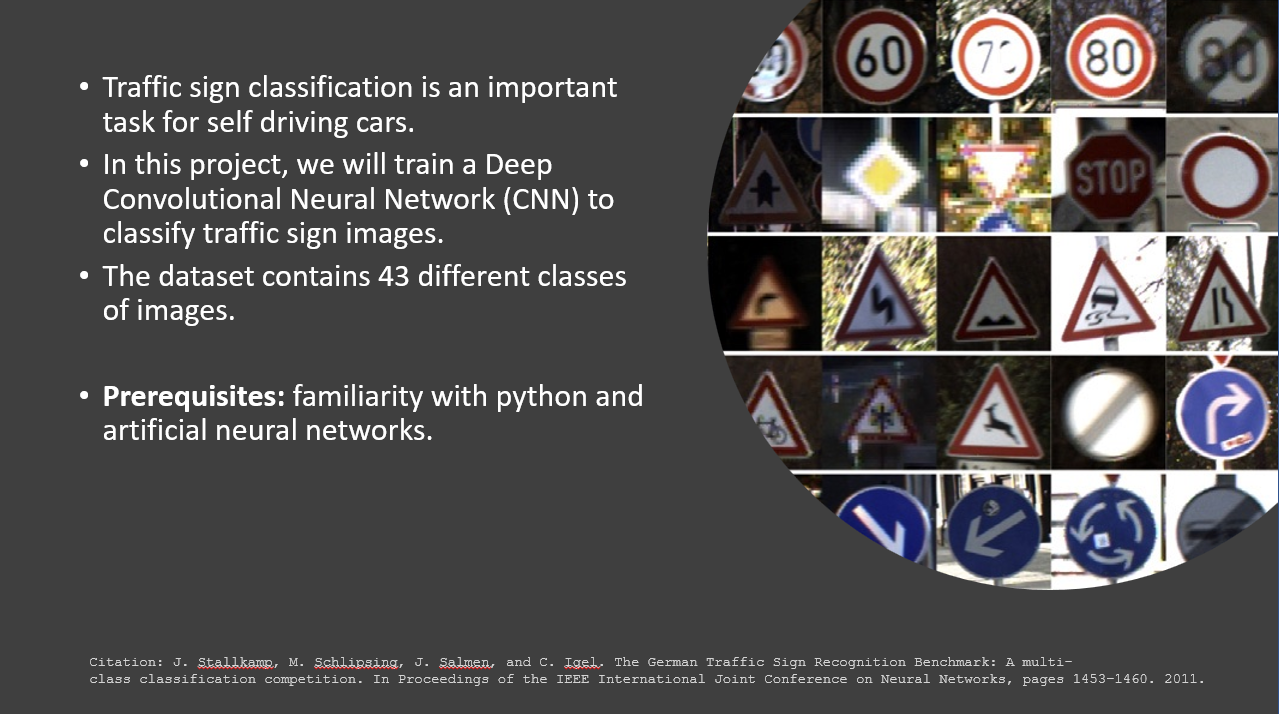

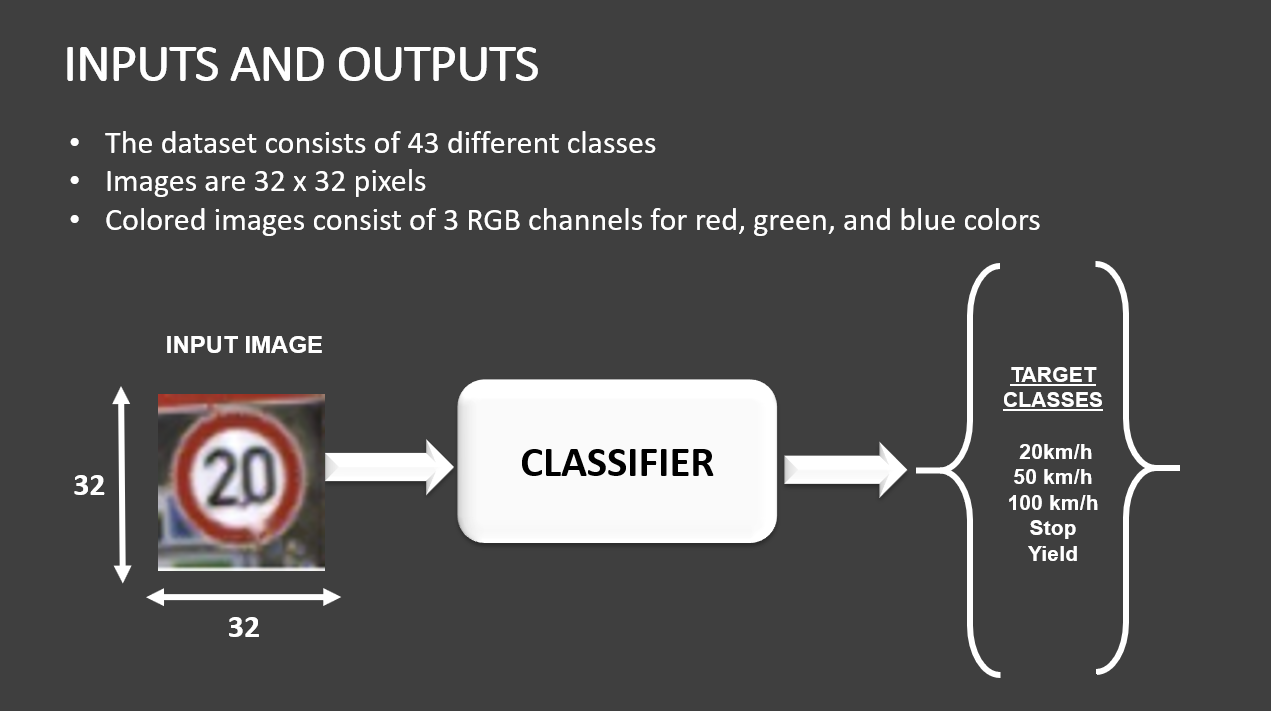

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

# IMPORT LIBRARIES/DATASETS

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

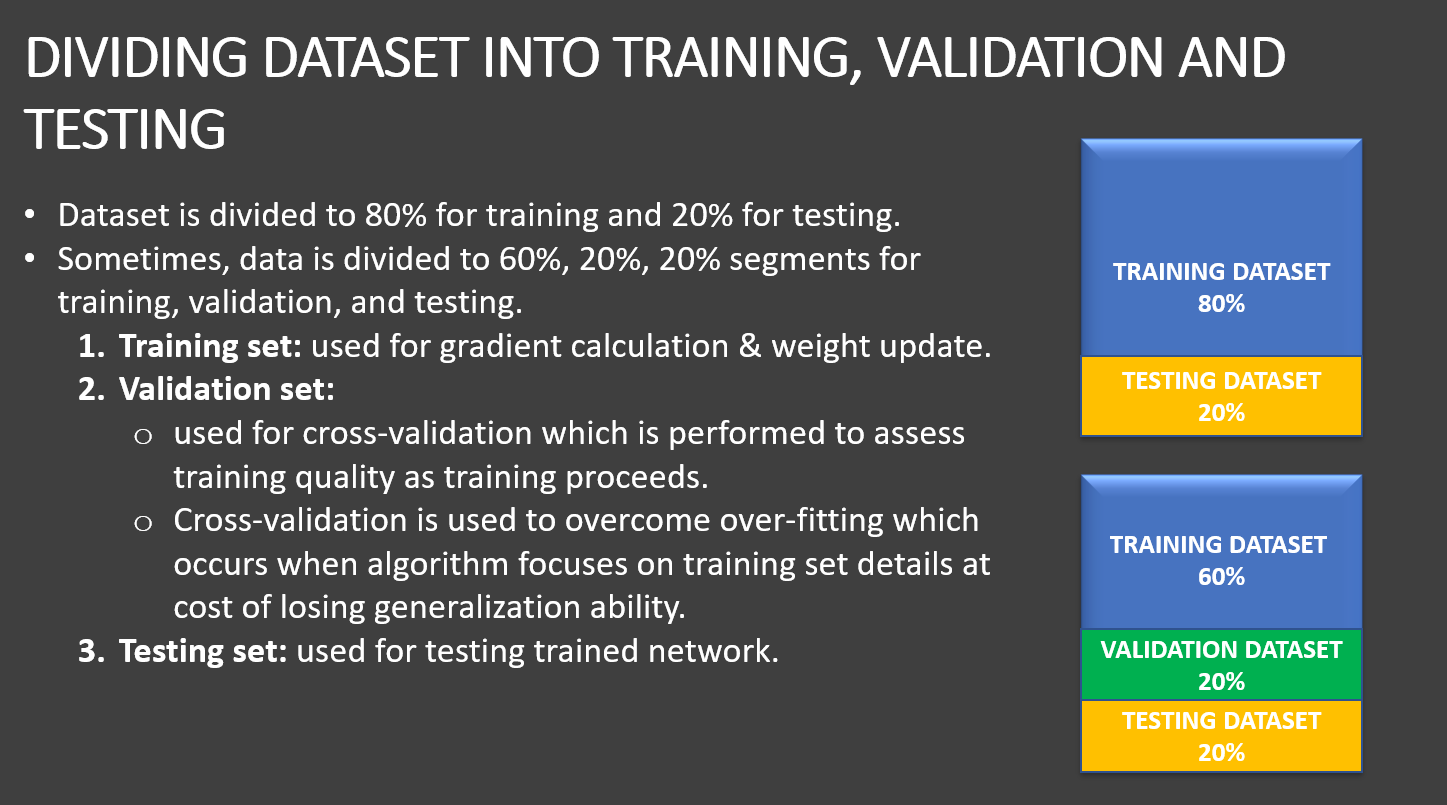

In [9]:
with open("./traffic-signs-images/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-images/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-images/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [10]:
x_train, y_train = train['features'], train['labels']
x_val, y_val = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [11]:
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

# PERFORM IMAGES VISUALIZATION

2

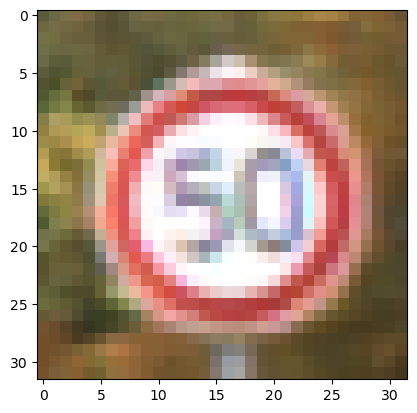

In [12]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

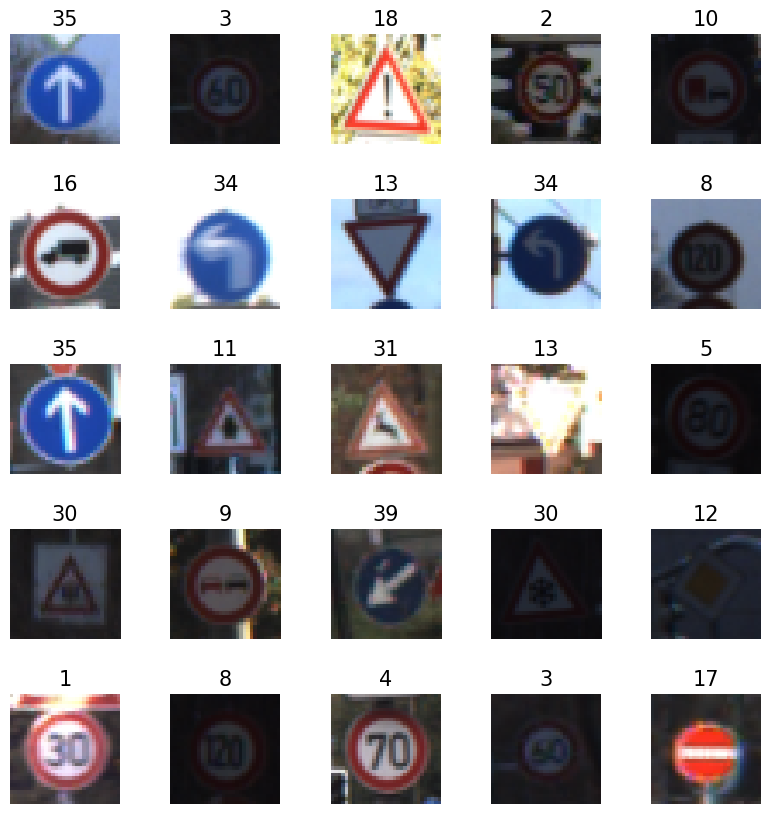

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.5)

        

# UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

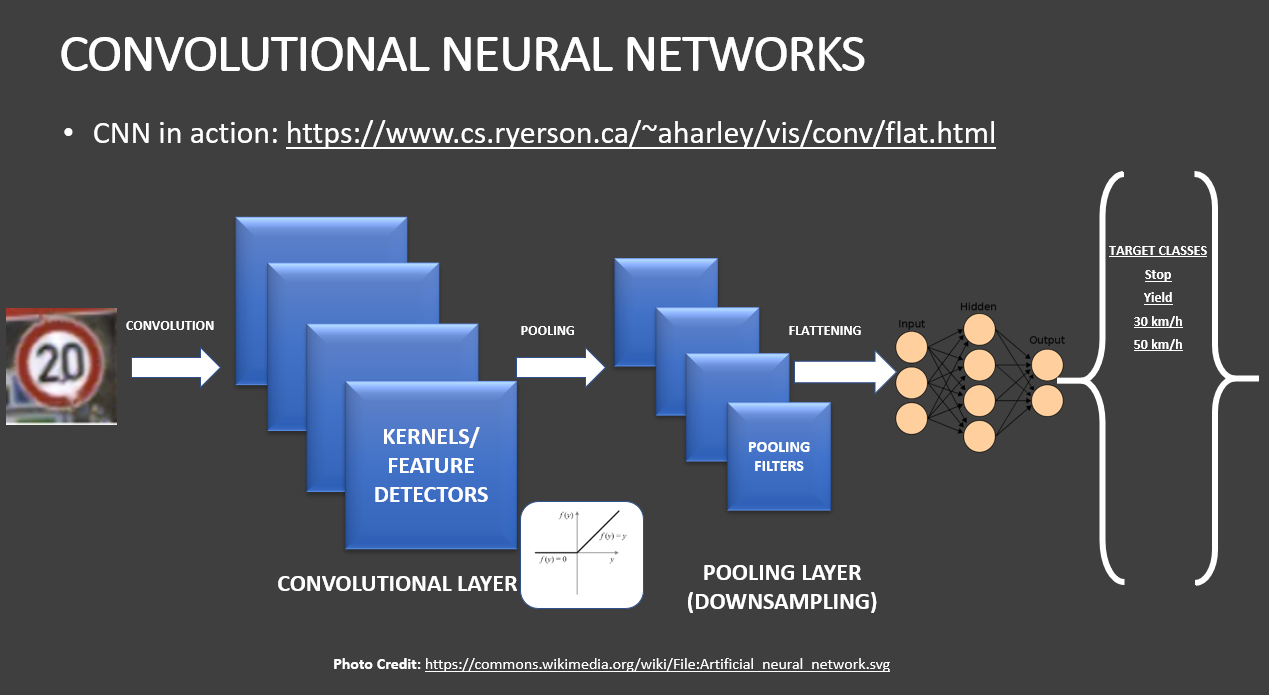

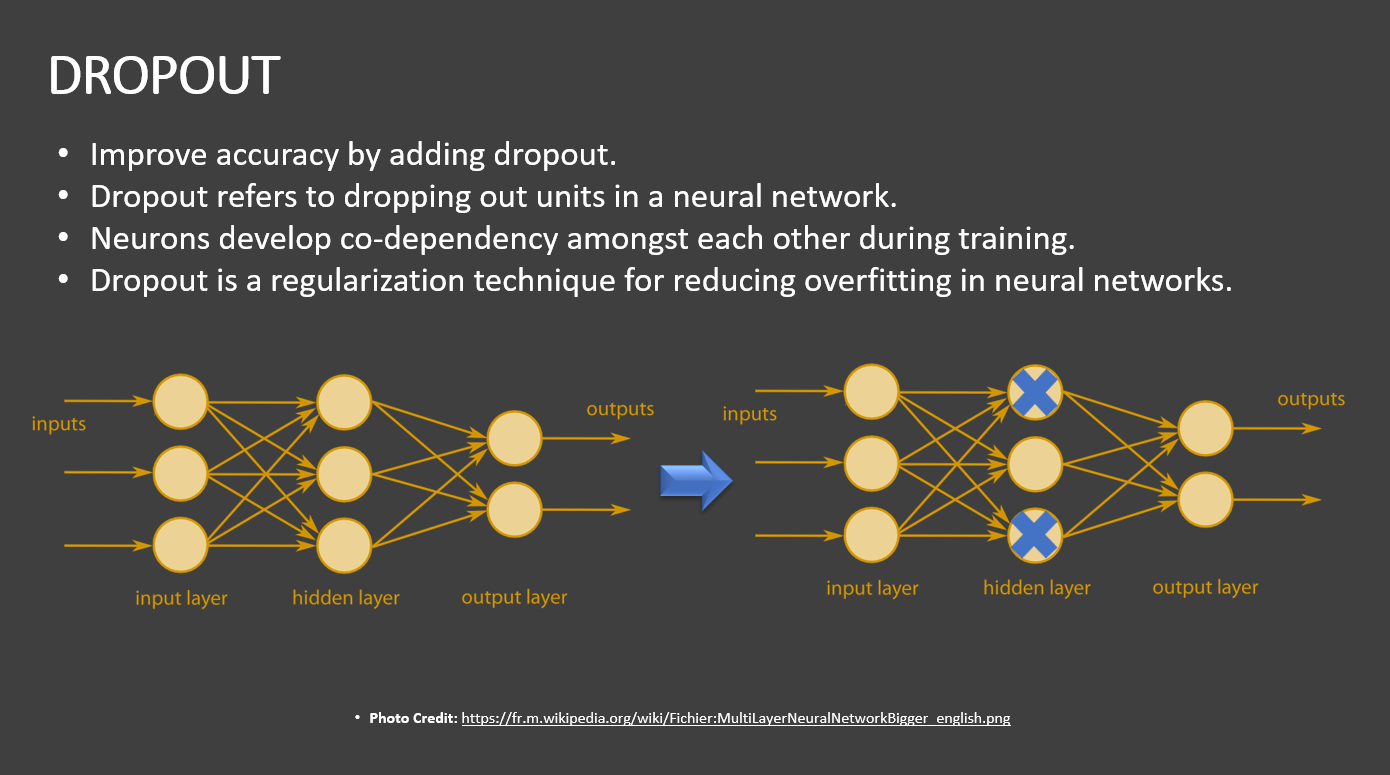

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [27]:
input_shape = (32, 32, 3)
output_shape = 43

In [28]:
from tensorflow.keras import datasets, layers, models

model = tf.keras.Sequential()
model.add(layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(14, kernel_size=(3,3), input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(14, kernel_size=(3,3), input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(output_shape,activation=tf.nn.softmax))

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 28)        784       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 14)        3542      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 14)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 14)          1778      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 14)        

# COMPILE AND TRAIN DEEP CNN MODEL

In [30]:
model.compile(
        optimizer = "Adam",
        metrics = 'accuracy',
        loss = 'sparse_categorical_crossentropy'
    )

In [31]:
model.fit(x_train, y_train, epochs = 10)# You can add validation sets

Epoch 1/10
1088/1088 [==============================] - 15s 13ms/step - loss: 2.5559 - accuracy: 0.4678
Epoch 2/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.7419 - accuracy: 0.7835
Epoch 3/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.4461 - accuracy: 0.8696
Epoch 4/10
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3223 - accuracy: 0.9077
Epoch 5/10
1088/1088 [==============================] - 14s 13ms/step - loss: 0.2794 - accuracy: 0.9220
Epoch 6/10
1088/1088 [==============================] - 15s 13ms/step - loss: 0.2443 - accuracy: 0.9326
Epoch 7/10
1088/1088 [==============================] - 16s 15ms/step - loss: 0.2266 - accuracy: 0.9382
Epoch 8/10
1088/1088 [==============================] - 16s 15ms/step - loss: 0.2057 - accuracy: 0.9434
Epoch 9/10
1088/1088 [==============================] - 16s 14ms/step - loss: 0.2046 - accuracy: 0.9463
Epoch 10/10
1088/1088 [==============================] - 16s 15m

# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [33]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 0.7349 - accuracy: 0.8858
Test Accuracy: 0.8858274221420288


395/395 [==============================] - 2s 4ms/step


<AxesSubplot:>

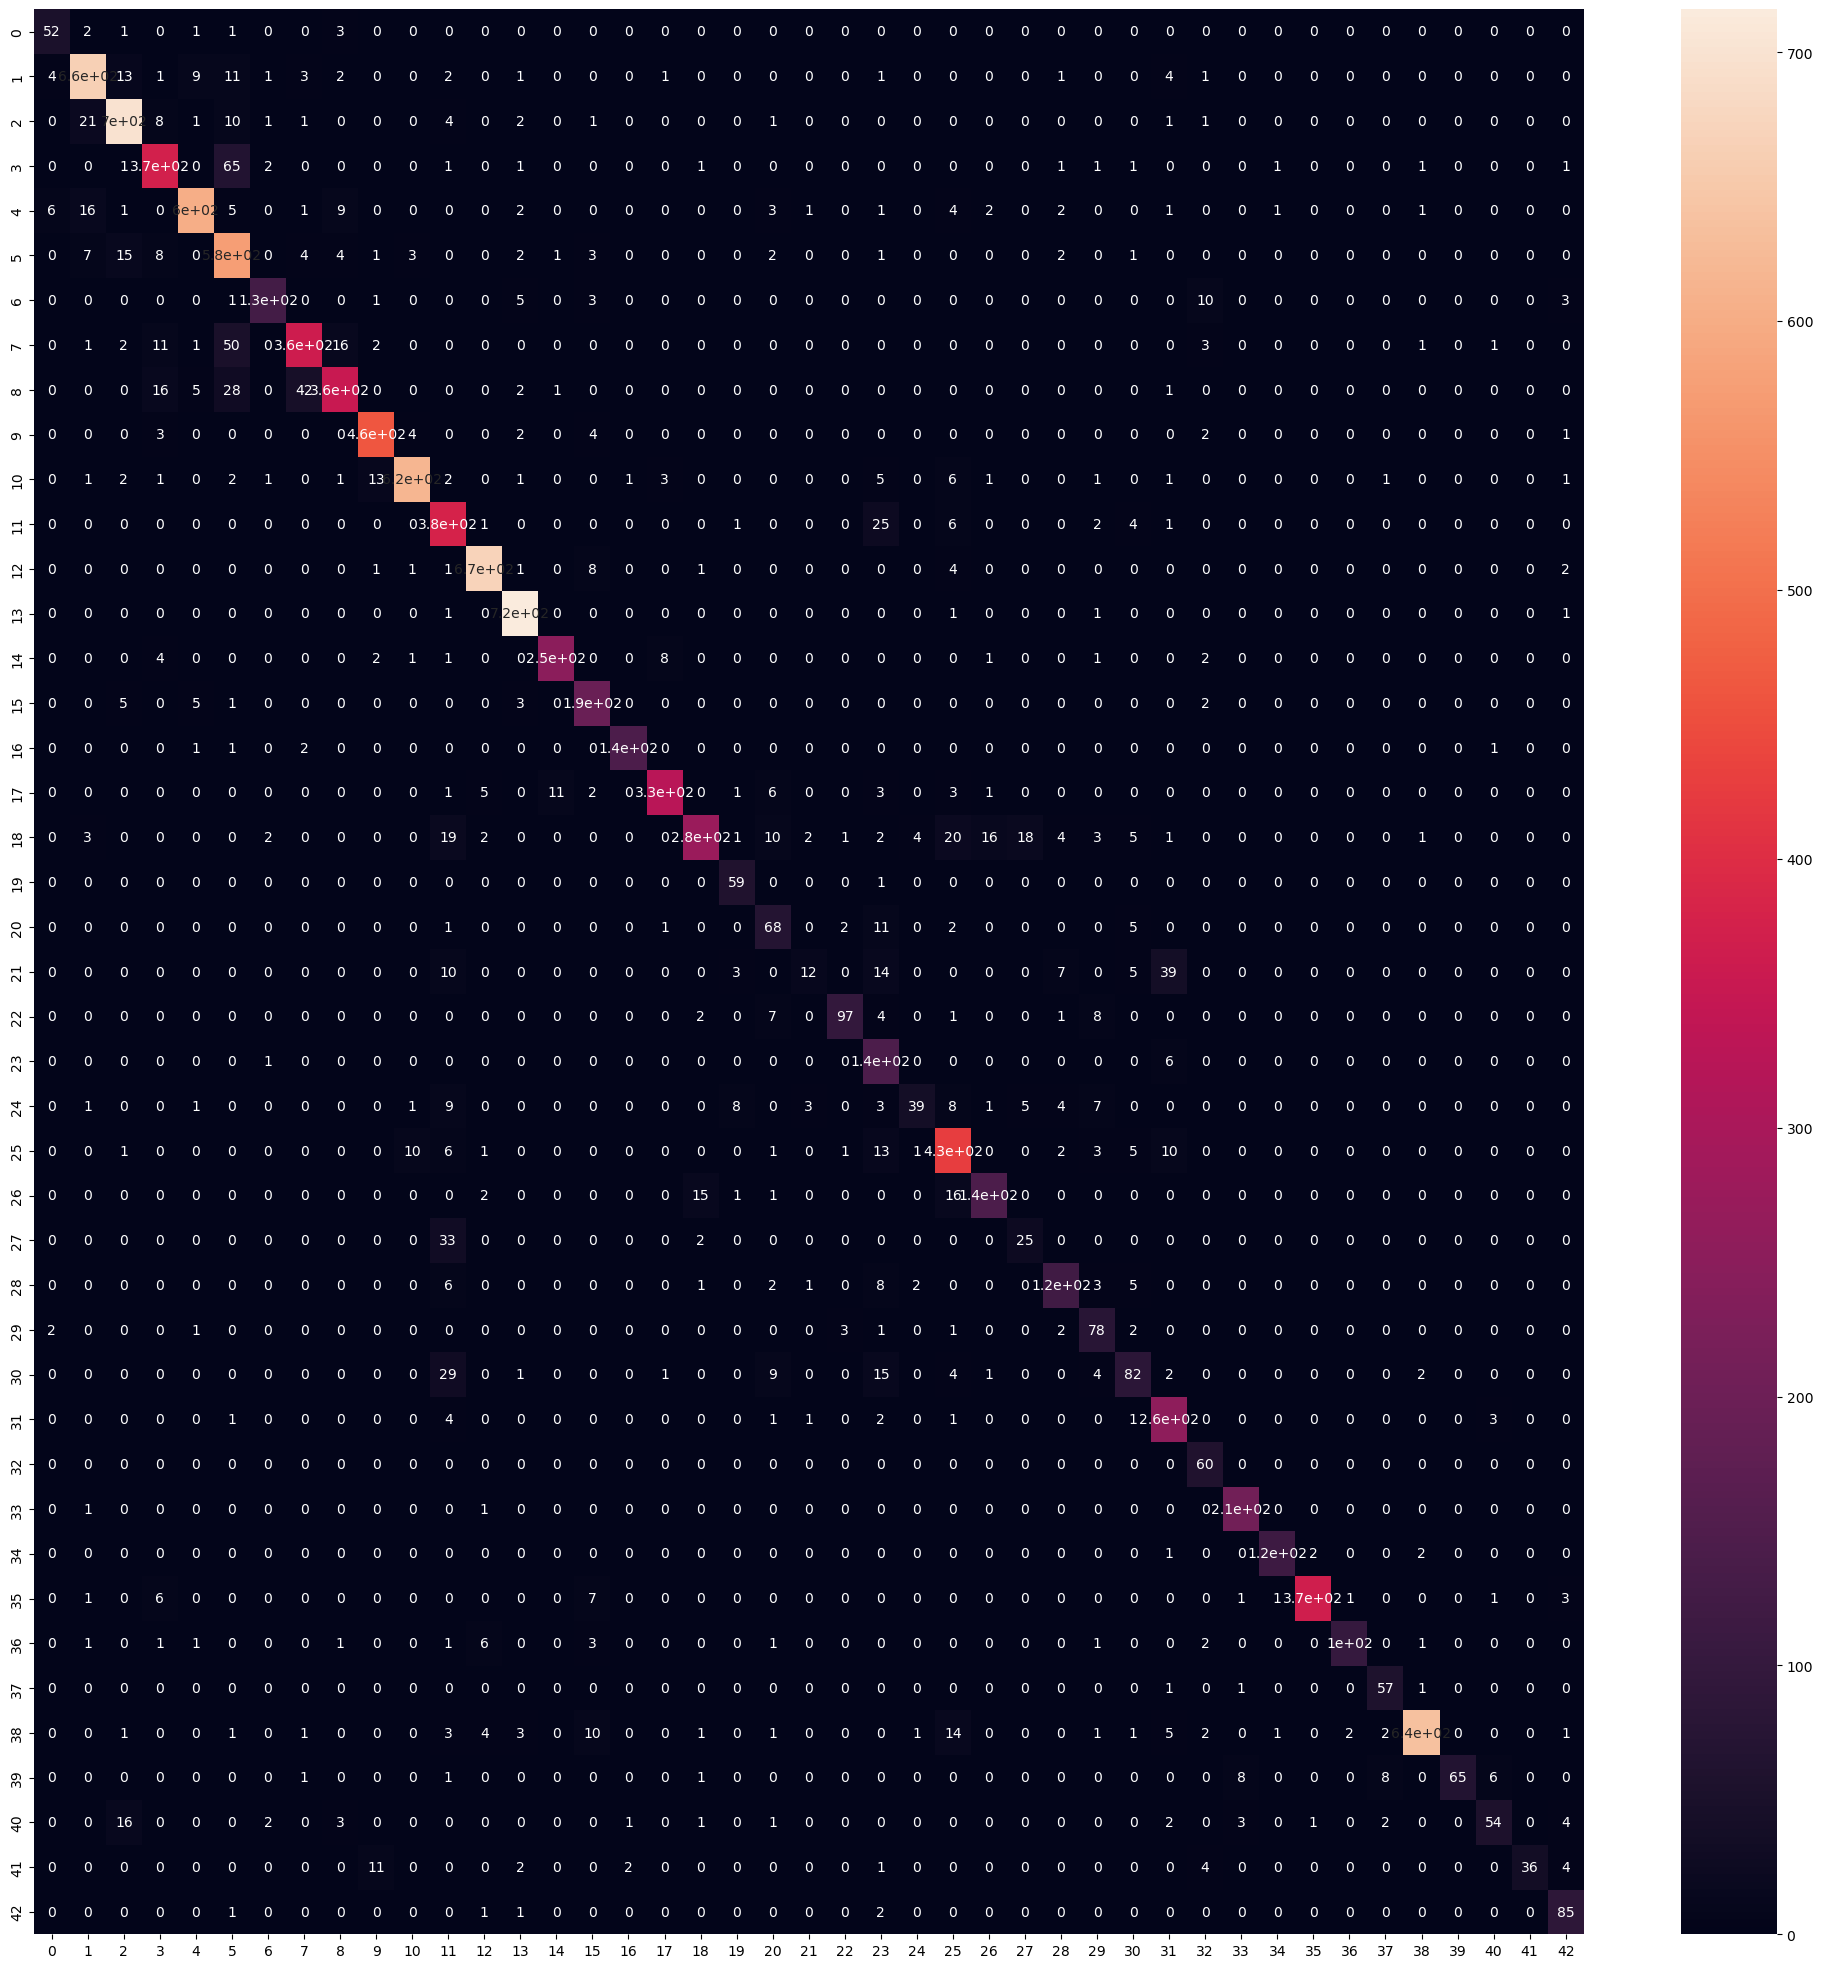

In [38]:
y_predicted = model.predict(x_test) 
predicted_classes = np.argmax(y_predicted,axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

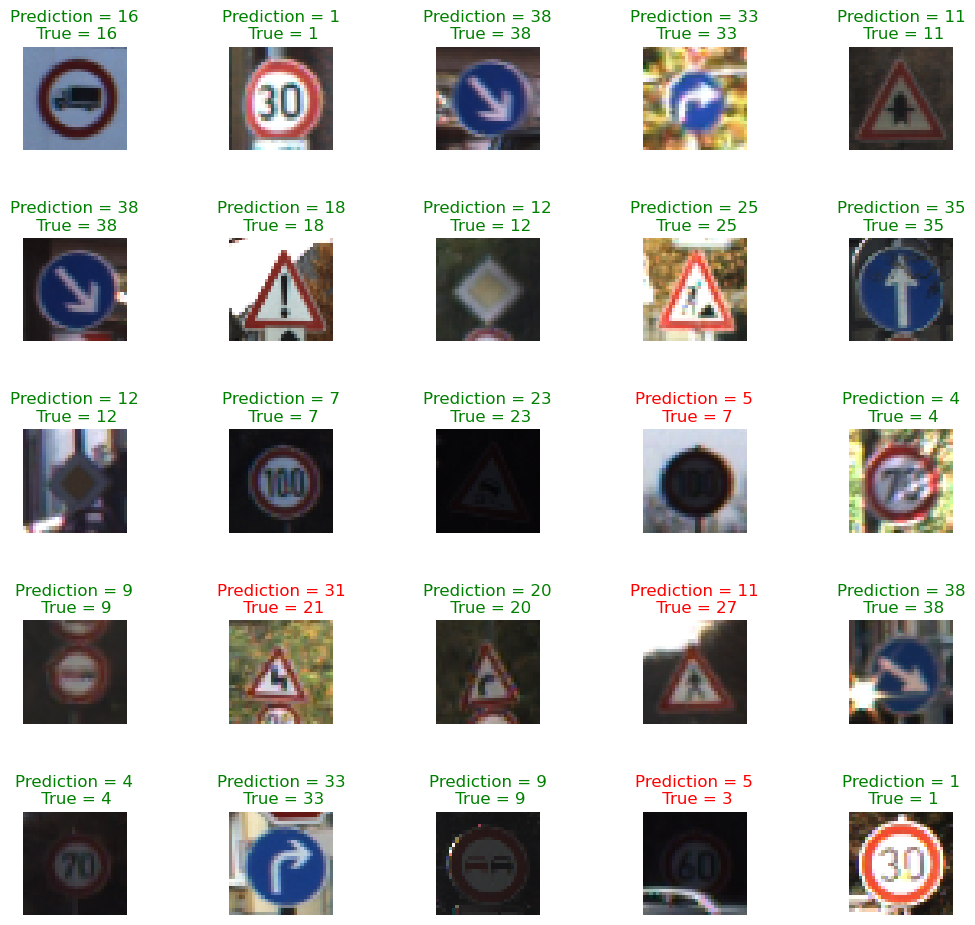

In [42]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].axis('off')
    
    col = 'g'
    if predicted_classes[i] != y_true[i]:
        col = 'r'
    
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]), color = col)
plt.subplots_adjust(wspace = 1)    

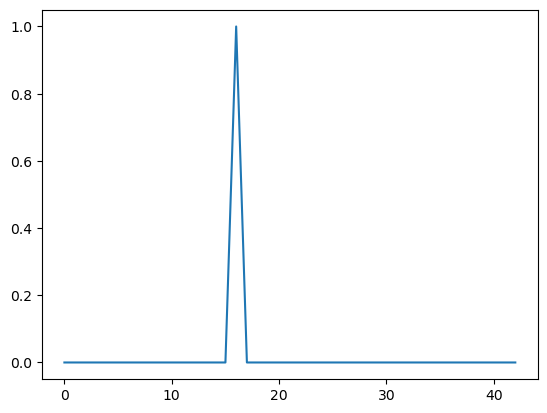

In [43]:
plt.plot(y_predicted[0])
plt.show()

In [45]:
y_predicted[0], np.argmax(y_predicted[0])

(array([0.0000000e+00, 3.2964357e-35, 1.7772371e-26, 1.1409908e-30,
        1.7118519e-28, 3.2687265e-19, 8.1835208e-24, 2.2060842e-20,
        1.4357604e-22, 2.1274849e-14, 2.9267474e-13, 0.0000000e+00,
        1.1220214e-29, 4.8176411e-38, 1.6874276e-29, 4.8472821e-31,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.4668126e-36, 0.0000000e+00, 0.0000000e+00, 2.8011272e-37,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.7115838e-32, 0.0000000e+00, 1.4816415e-37, 0.0000000e+00,
        0.0000000e+00, 1.0381642e-35, 0.0000000e+00, 0.0000000e+00,
        1.1654516e-26, 1.7023911e-34, 2.5145363e-23], dtype=float32),
 16)